# Data Preprocessing

In [1]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import dataset
dataset = pd.read_csv('Data.csv')
dataset

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes

In [14]:
# X: independent variable; y: dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
# Taking care of missing data: axis = 0: column average, axis = 1: row average
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [16]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [17]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features =  [0])
X = onehotencoder.fit_transform(X).toarray()
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [18]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Fearure Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Simple Linear Regression

In [12]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Section 4 - Simple Linear Regression/Salary_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [14]:
# Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

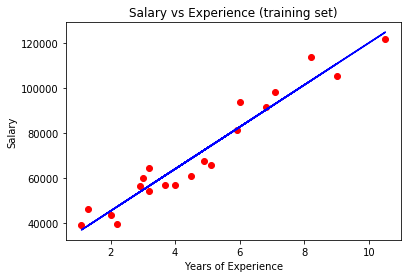

In [18]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

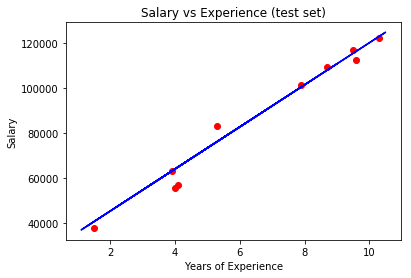

In [19]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

## Assumtions of a Linear Regression:
### 1. Linearity
### 2. Homoscedasticity
### 3. Multivariate normality
### 4. Independence of errors
### 5. Lack of Multicollinearity

## 5 methods of building models
### 1. All-in
### 2. Backward Elimination
### 3. Forward Selection
### 4. Bidirectional Elimination
### 5. Score Comparison

In [32]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 5/Section 5 - Multiple Linear Regression/50_Startups.csv')
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [33]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [34]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

In [35]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features =  [3])
X = onehotencoder.fit_transform(X).toarray()

In [36]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [40]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X_train = np.append(arr = np.ones((40,1)), values = X_train, axis = 1)

In [41]:
X_opt = X_train[:, [0,1,2,3,4,5]]

In [42]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           3.91e-21
Time:                        23:59:00   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.255e+04   8358.538      5.091      0.000    2.56e+04    5.95e+04
x1          -959.2842   4038.108     -0.238      0.814   -9165.706    7247.138
x2           699.3691   3661.563      0.191      0.850   -6741.822    8140.560
x3             0.7735      0.055     14.025      0.000       0.661       0.886
x4             0.0329      0.066      0.495      0.624      -0.102       0.168
x5             0.0366      0.019      1.884      0.068      -0.003       0.076
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_opt = X_train[:, [0,1,3,4,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.7
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.87e-22
Time:                        23:59:42   Log-Likelihood:                -421.12
No. Observations:                  40   AIC:                             852.2
Df Residuals:                      35   BIC:                             860.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.292e+04   8020.397      5.352      0.000    2.66e+04    5.92e+04
x1         -1272.1608   3639.780     -0.350      0.729   -8661.308    6116.986
x2             0.7754      0.053     14.498      0.000       0.667       0.884
x3             0.0319      0.065      0.488      0.629      -0.101       0.165
x4             0.0363      0.019      1.902      0.065      -0.002       0.075
==============================================================================
Omnibus:                       16.074   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.553
Skew:                          -1.086   Prob(JB):                     4.66e-06
Kurtosis:                       6.164   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_opt = X_train[:, [0,3,4,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.8
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.85e-23
Time:                        00:00:00   Log-Likelihood:                -421.19
No. Observations:                  40   AIC:                             850.4
Df Residuals:                      36   BIC:                             857.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.299e+04   7919.773      5.428      0.000    2.69e+04    5.91e+04
x1             0.7788      0.052     15.003      0.000       0.674       0.884
x2             0.0294      0.064      0.458      0.650      -0.101       0.160
x3             0.0347      0.018      1.896      0.066      -0.002       0.072
==============================================================================
Omnibus:                       15.557   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.539
Skew:                          -1.081   Prob(JB):                     1.28e-05
Kurtosis:                       5.974   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X_opt = X_train[:, [0,3,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     349.0
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           9.65e-25
Time:                        00:00:15   Log-Likelihood:                -421.30
No. Observations:                  40   AIC:                             848.6
Df Residuals:                      37   BIC:                             853.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.635e+04   2971.236     15.598      0.000    4.03e+04    5.24e+04
x1             0.7886      0.047     16.846      0.000       0.694       0.883
x2             0.0326      0.018      1.860      0.071      -0.003       0.068
==============================================================================
Omnibus:                       14.666   Durbin-Watson:                   2.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.582
Skew:                          -1.030   Prob(JB):                     3.39e-05
Kurtosis:                       5.847   Cond. No.                     4.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_opt = X_train[:, [0,3]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.56e-25
Time:                        00:00:39   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e+04   2842.717     17.032      0.000    4.27e+04    5.42e+04
x1             0.8516      0.033     25.542      0.000       0.784       0.919
==============================================================================
Omnibus:                       13.132   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.254
Skew:                          -0.991   Prob(JB):                     0.000295
Kurtosis:                       5.413   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

In [18]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 6/Section 6 - Polynomial Regression/Position_Salaries.csv')
dataset

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

In [19]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [20]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

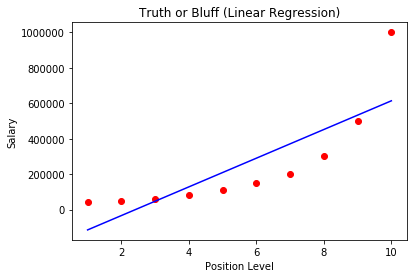

In [23]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Linear Regression)')
plt.show()

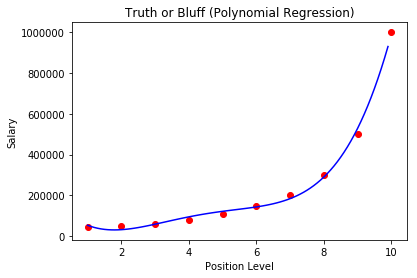

In [30]:
# Visualising the Polynomial Regression results
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.show()

In [31]:
# Predict a new result with Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [32]:
# Predict a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])

# Logistic Regression

In [5]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 9 - Logistic Regression/Section 10 - Logistic Regression/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [9]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

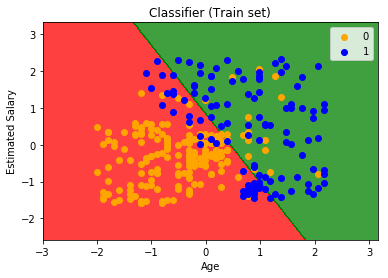

In [22]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

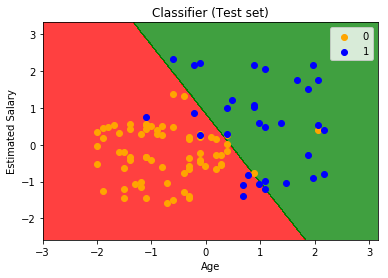

In [21]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Support Vector Machine

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

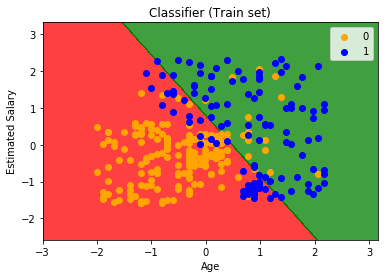

In [11]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

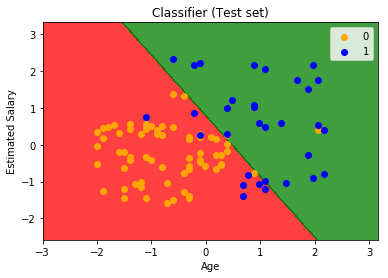

In [12]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Kernel SVM

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

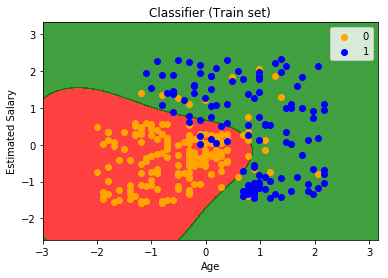

In [10]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

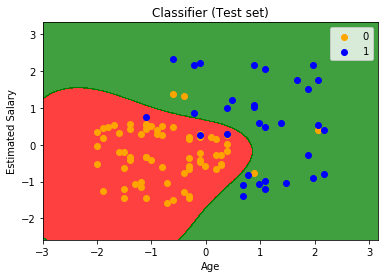

In [11]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Naive Bayes

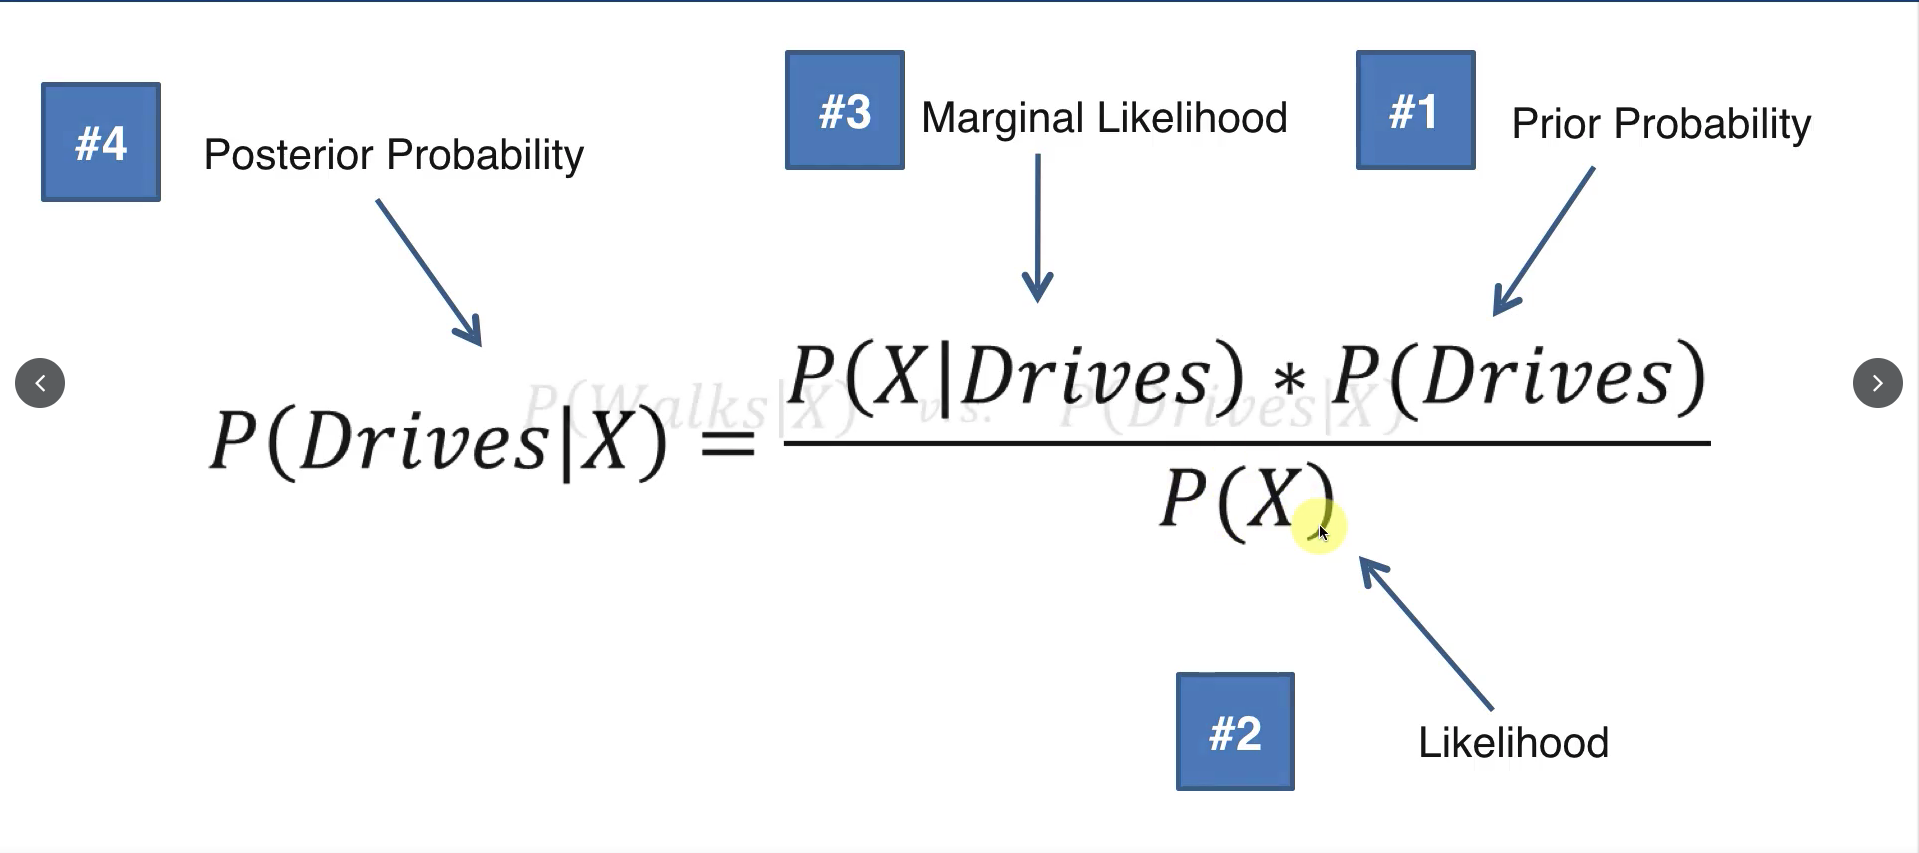

In [8]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Naive_Bayes.png")

In [9]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [10]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

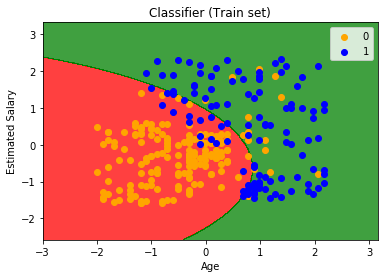

In [17]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

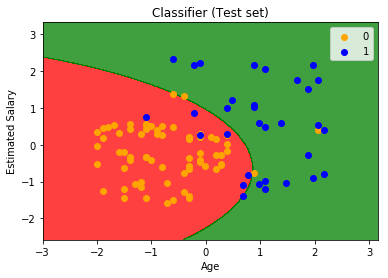

In [18]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Decision Tree

In [6]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [7]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

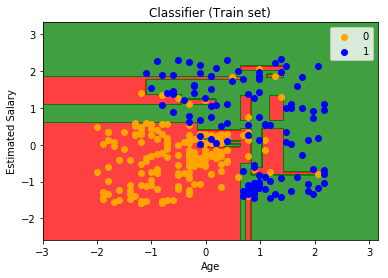

In [14]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

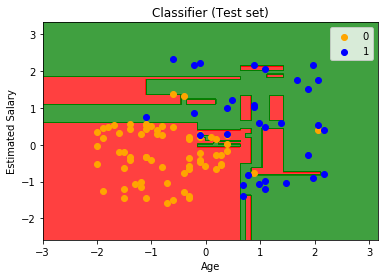

In [15]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Random Forest

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]])

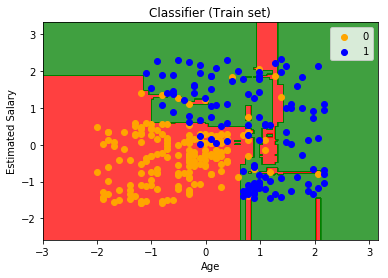

In [9]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

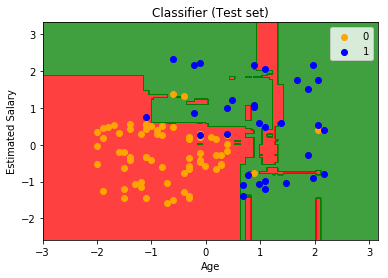

In [10]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

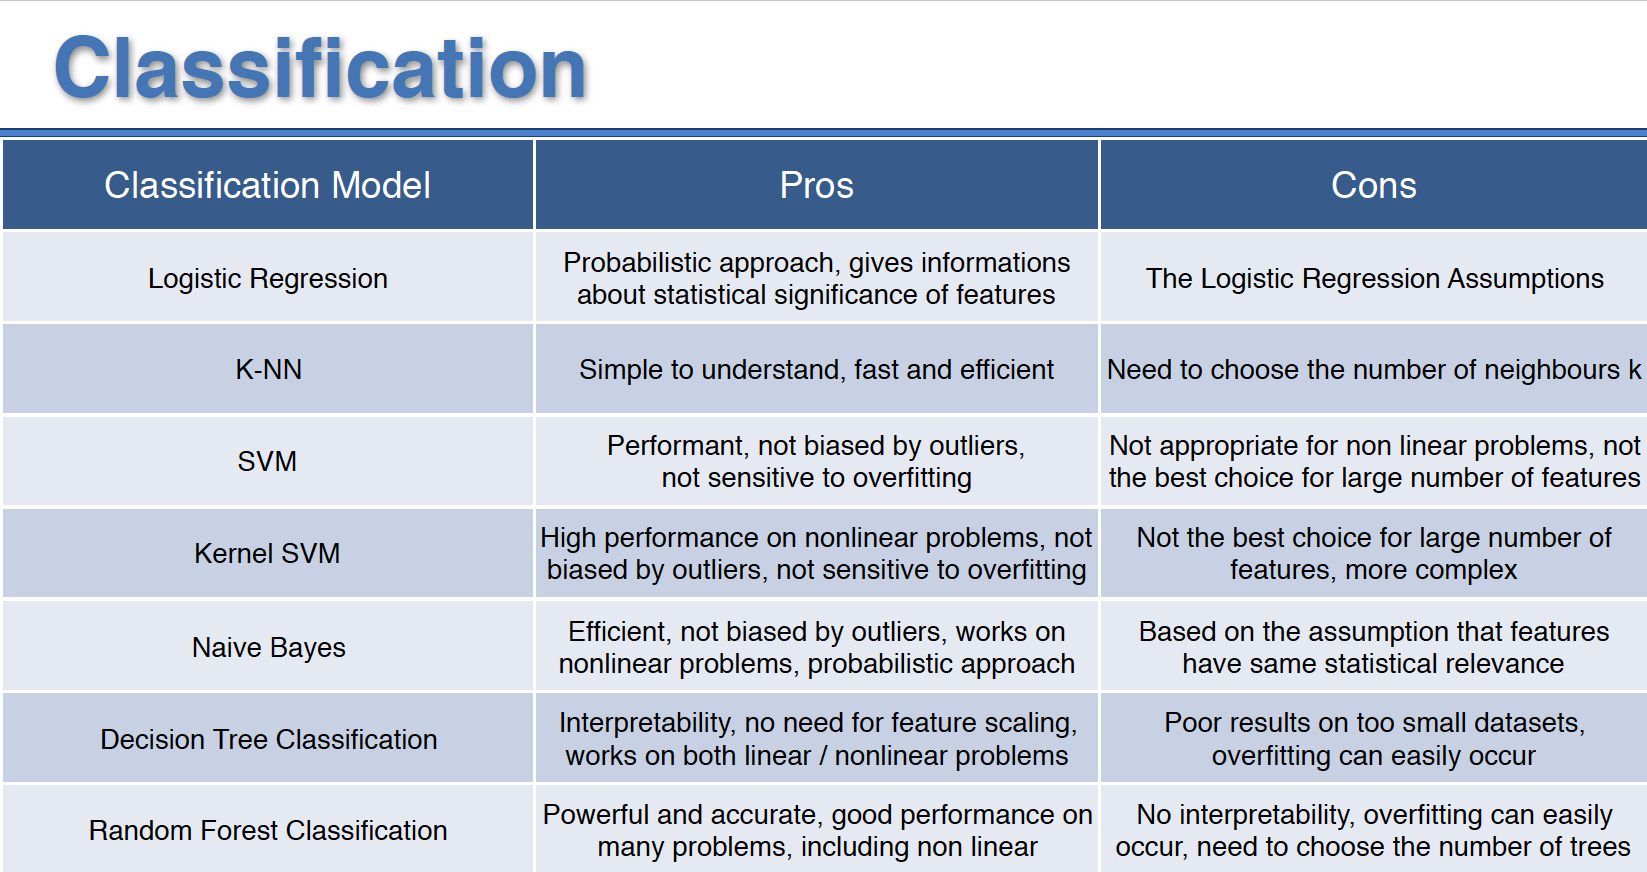

In [3]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Classification.png")

# KMeans Clustering

In [10]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 18 - K-Means Clustering/Mall_Customers.csv')
dataset.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [11]:
X = dataset.iloc[:,3:5].values

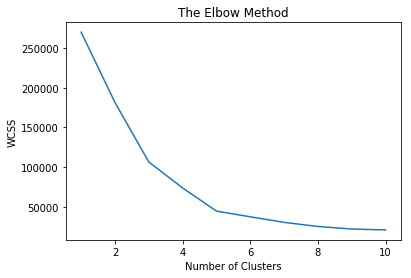

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Applying the k-means to the dataset
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

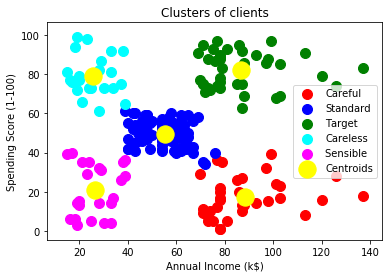

In [18]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible ')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Apriori

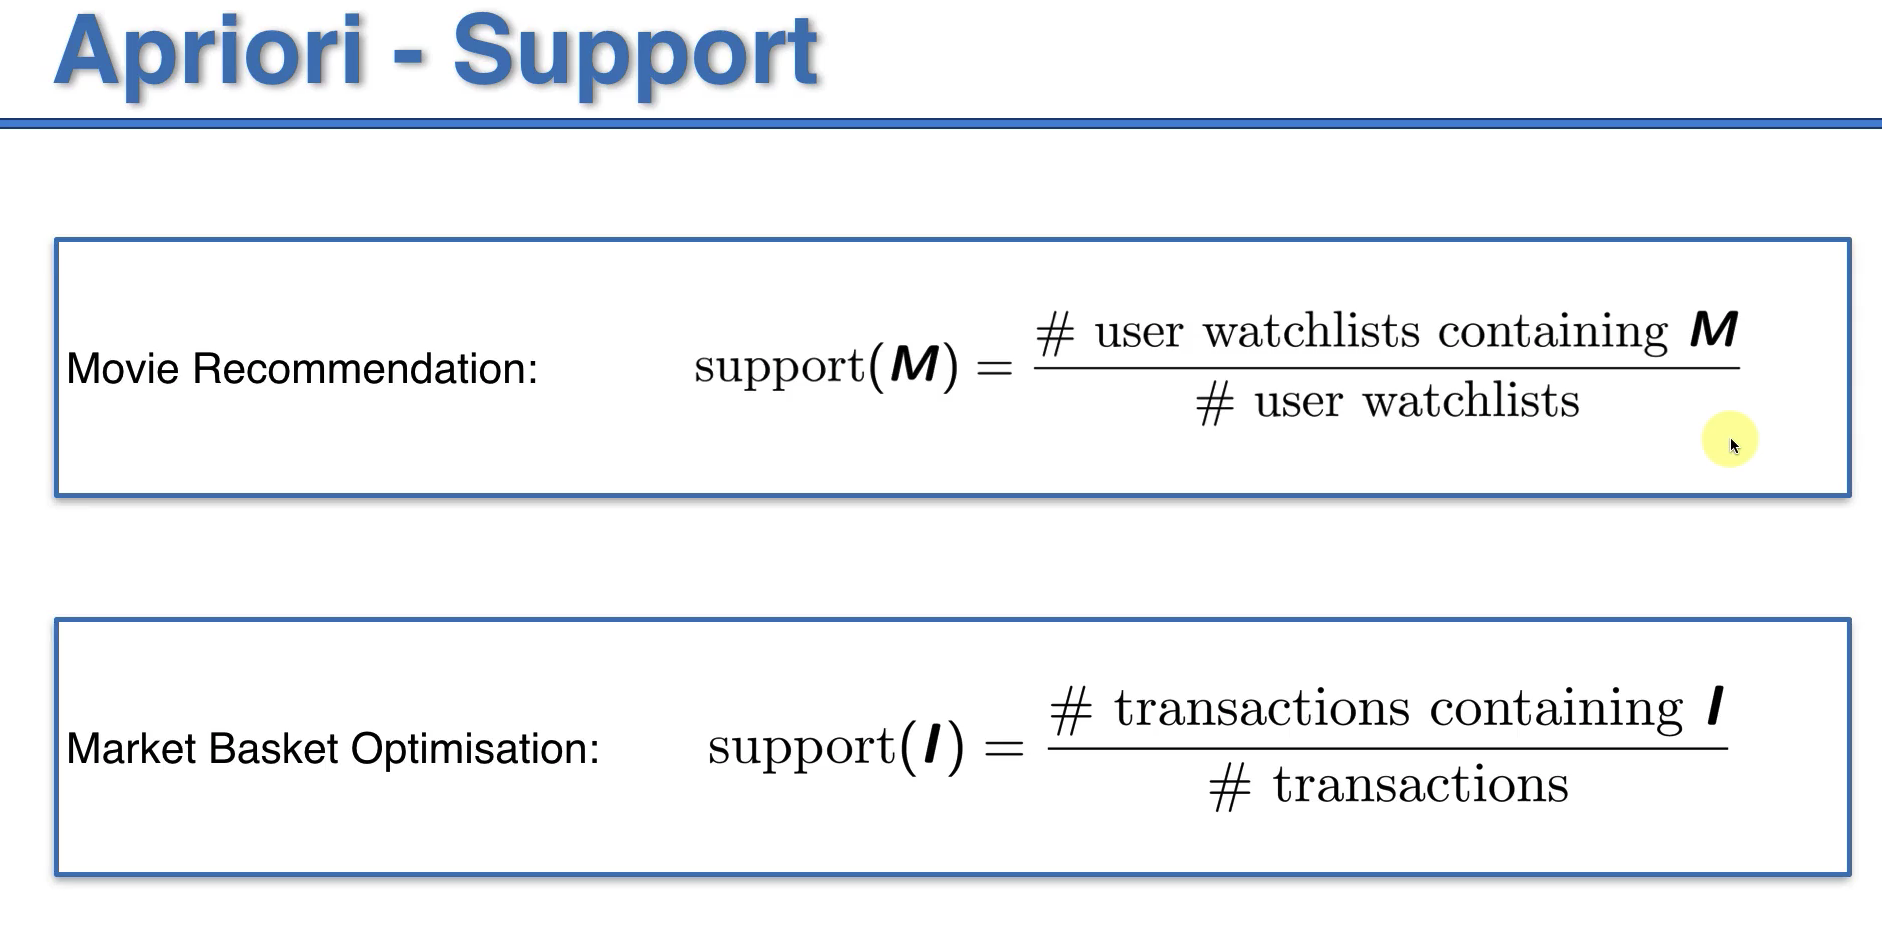

In [2]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Support.png")

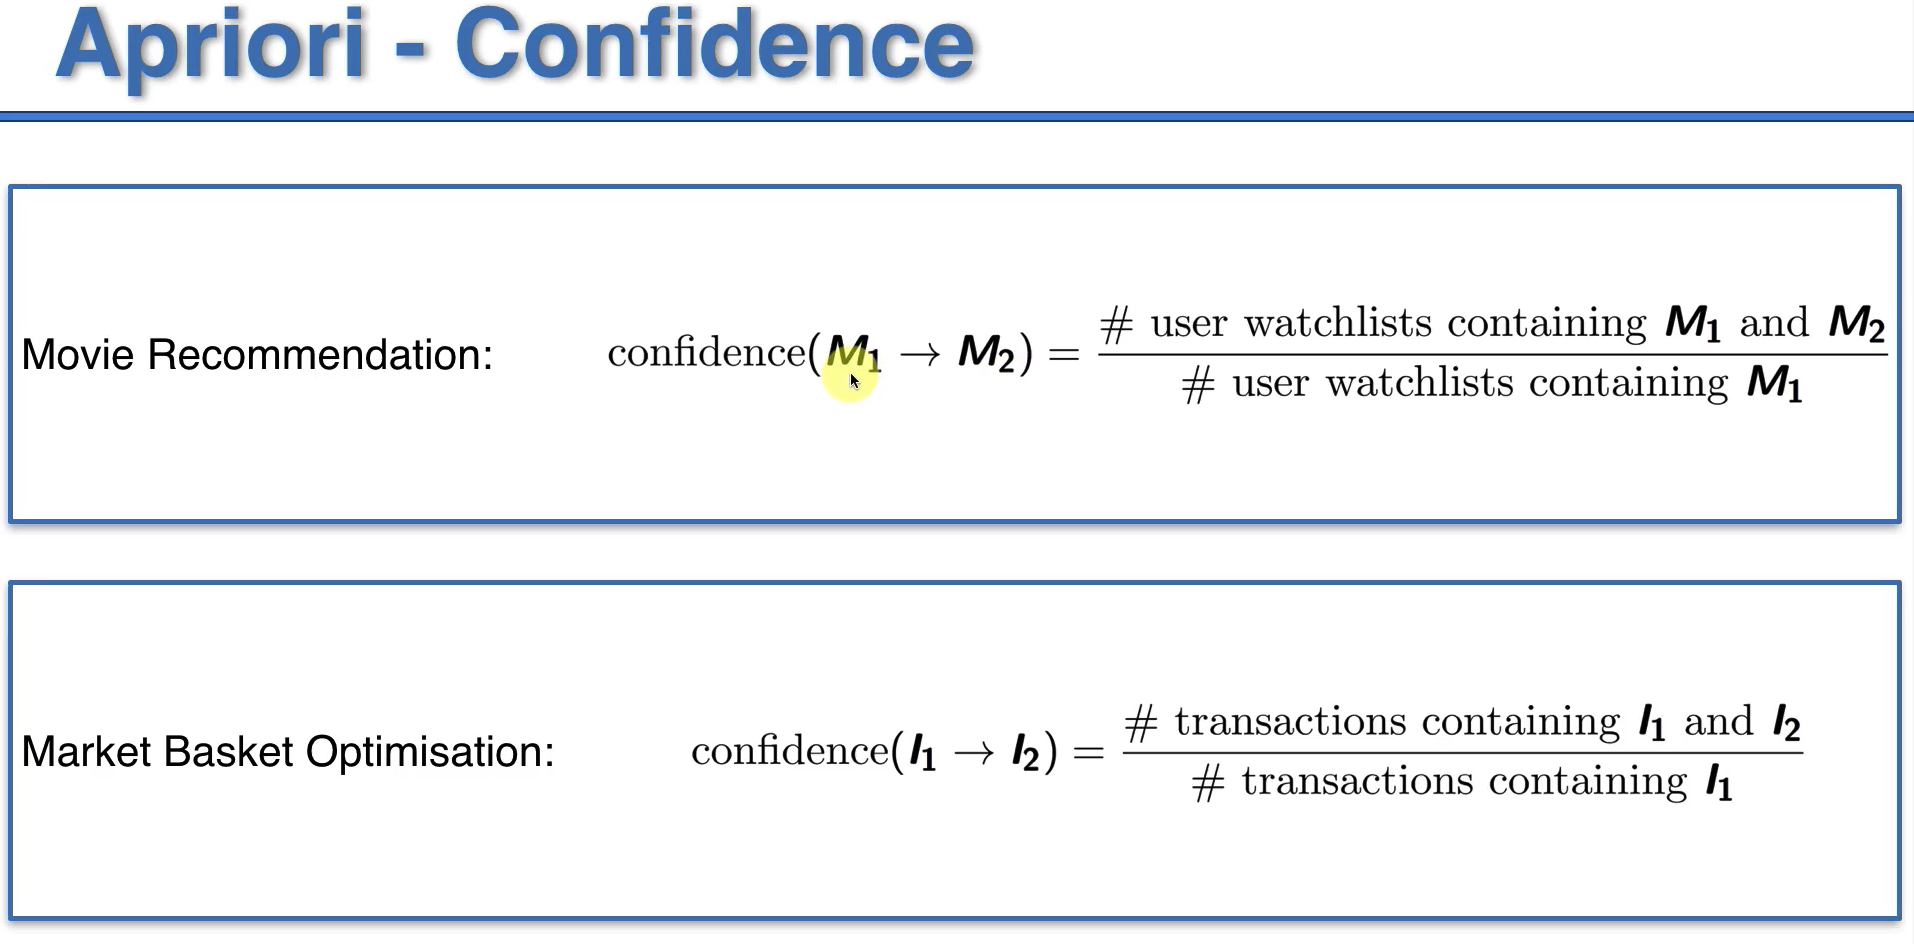

In [3]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Confidence.png")

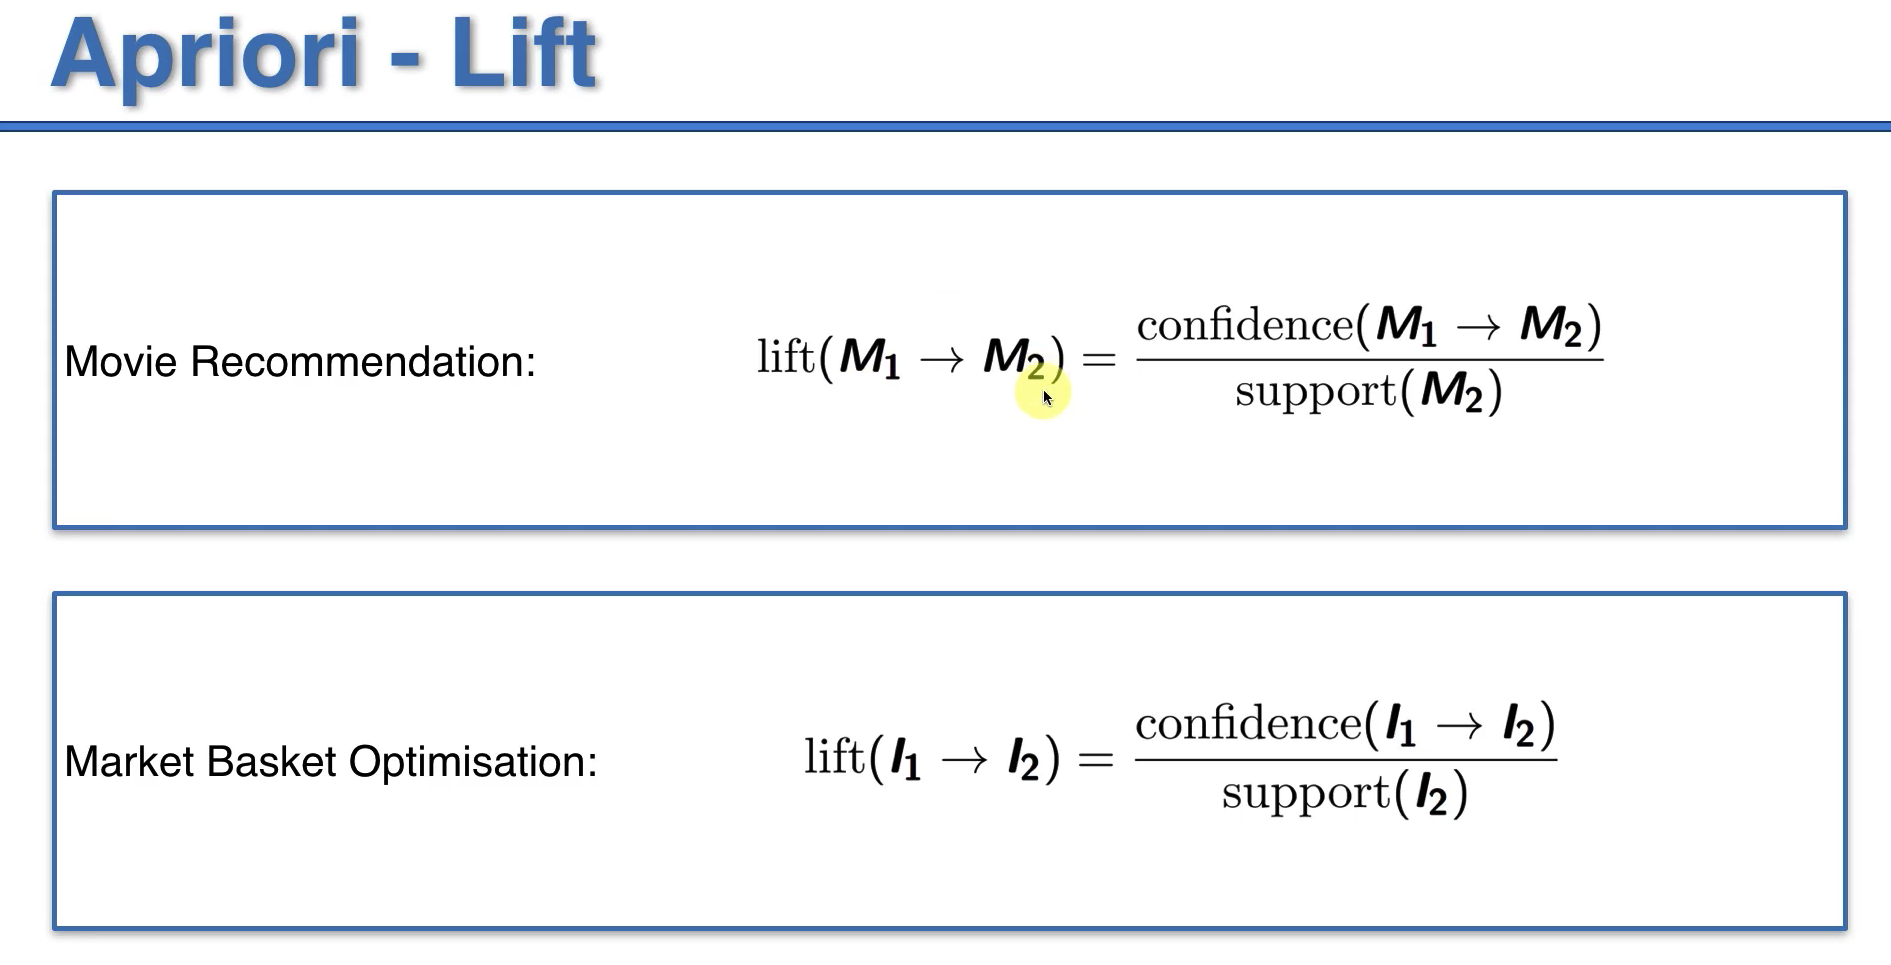

In [4]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Lift.png")

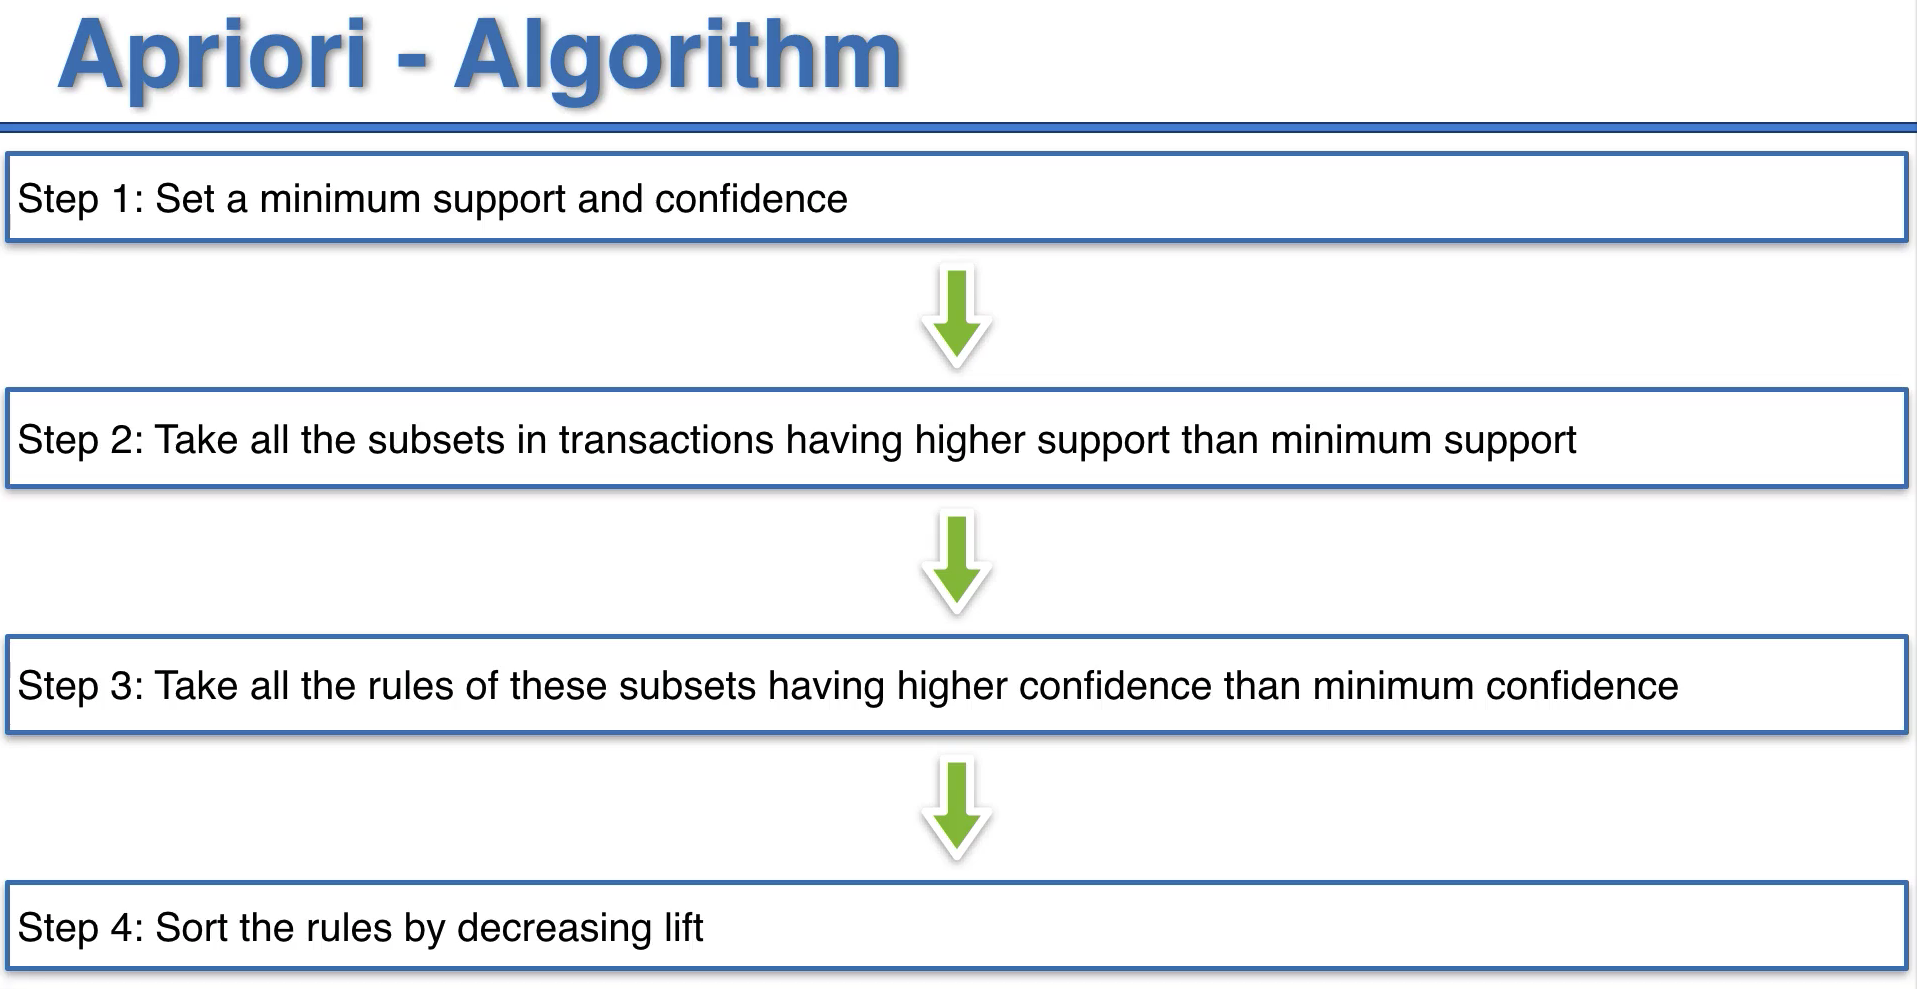

In [5]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Algorithm.png")

In [21]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 19 - Apriori/Apriori_Python/Market_Basket_Optimisation.csv', header = None)
dataset.head()

0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  salad  mineral water  salmon   
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   
3             NaN        NaN    NaN    NaN            NaN     NaN   
4             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN  
3                NaN              NaN      NaN        NaN  
4                NaN              NaN      NaN        NaN

In [10]:
dataset.shape

(7501, 20)

In [22]:
transactions = []

In [23]:
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

In [24]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [25]:
# Visualsing the results
results = list(rules)
myResults = [list(x) for x in results]

# Reinforcement Learning - Upper Confidence Bound

In [27]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 20 - UCB/Ads_CTR_Optimisation.csv')
dataset.head()

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0

In [4]:
dataset.shape

(10000, 10)

In [6]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0,N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    total_reward = total_reward + reward

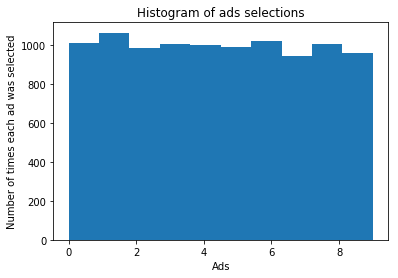

In [7]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

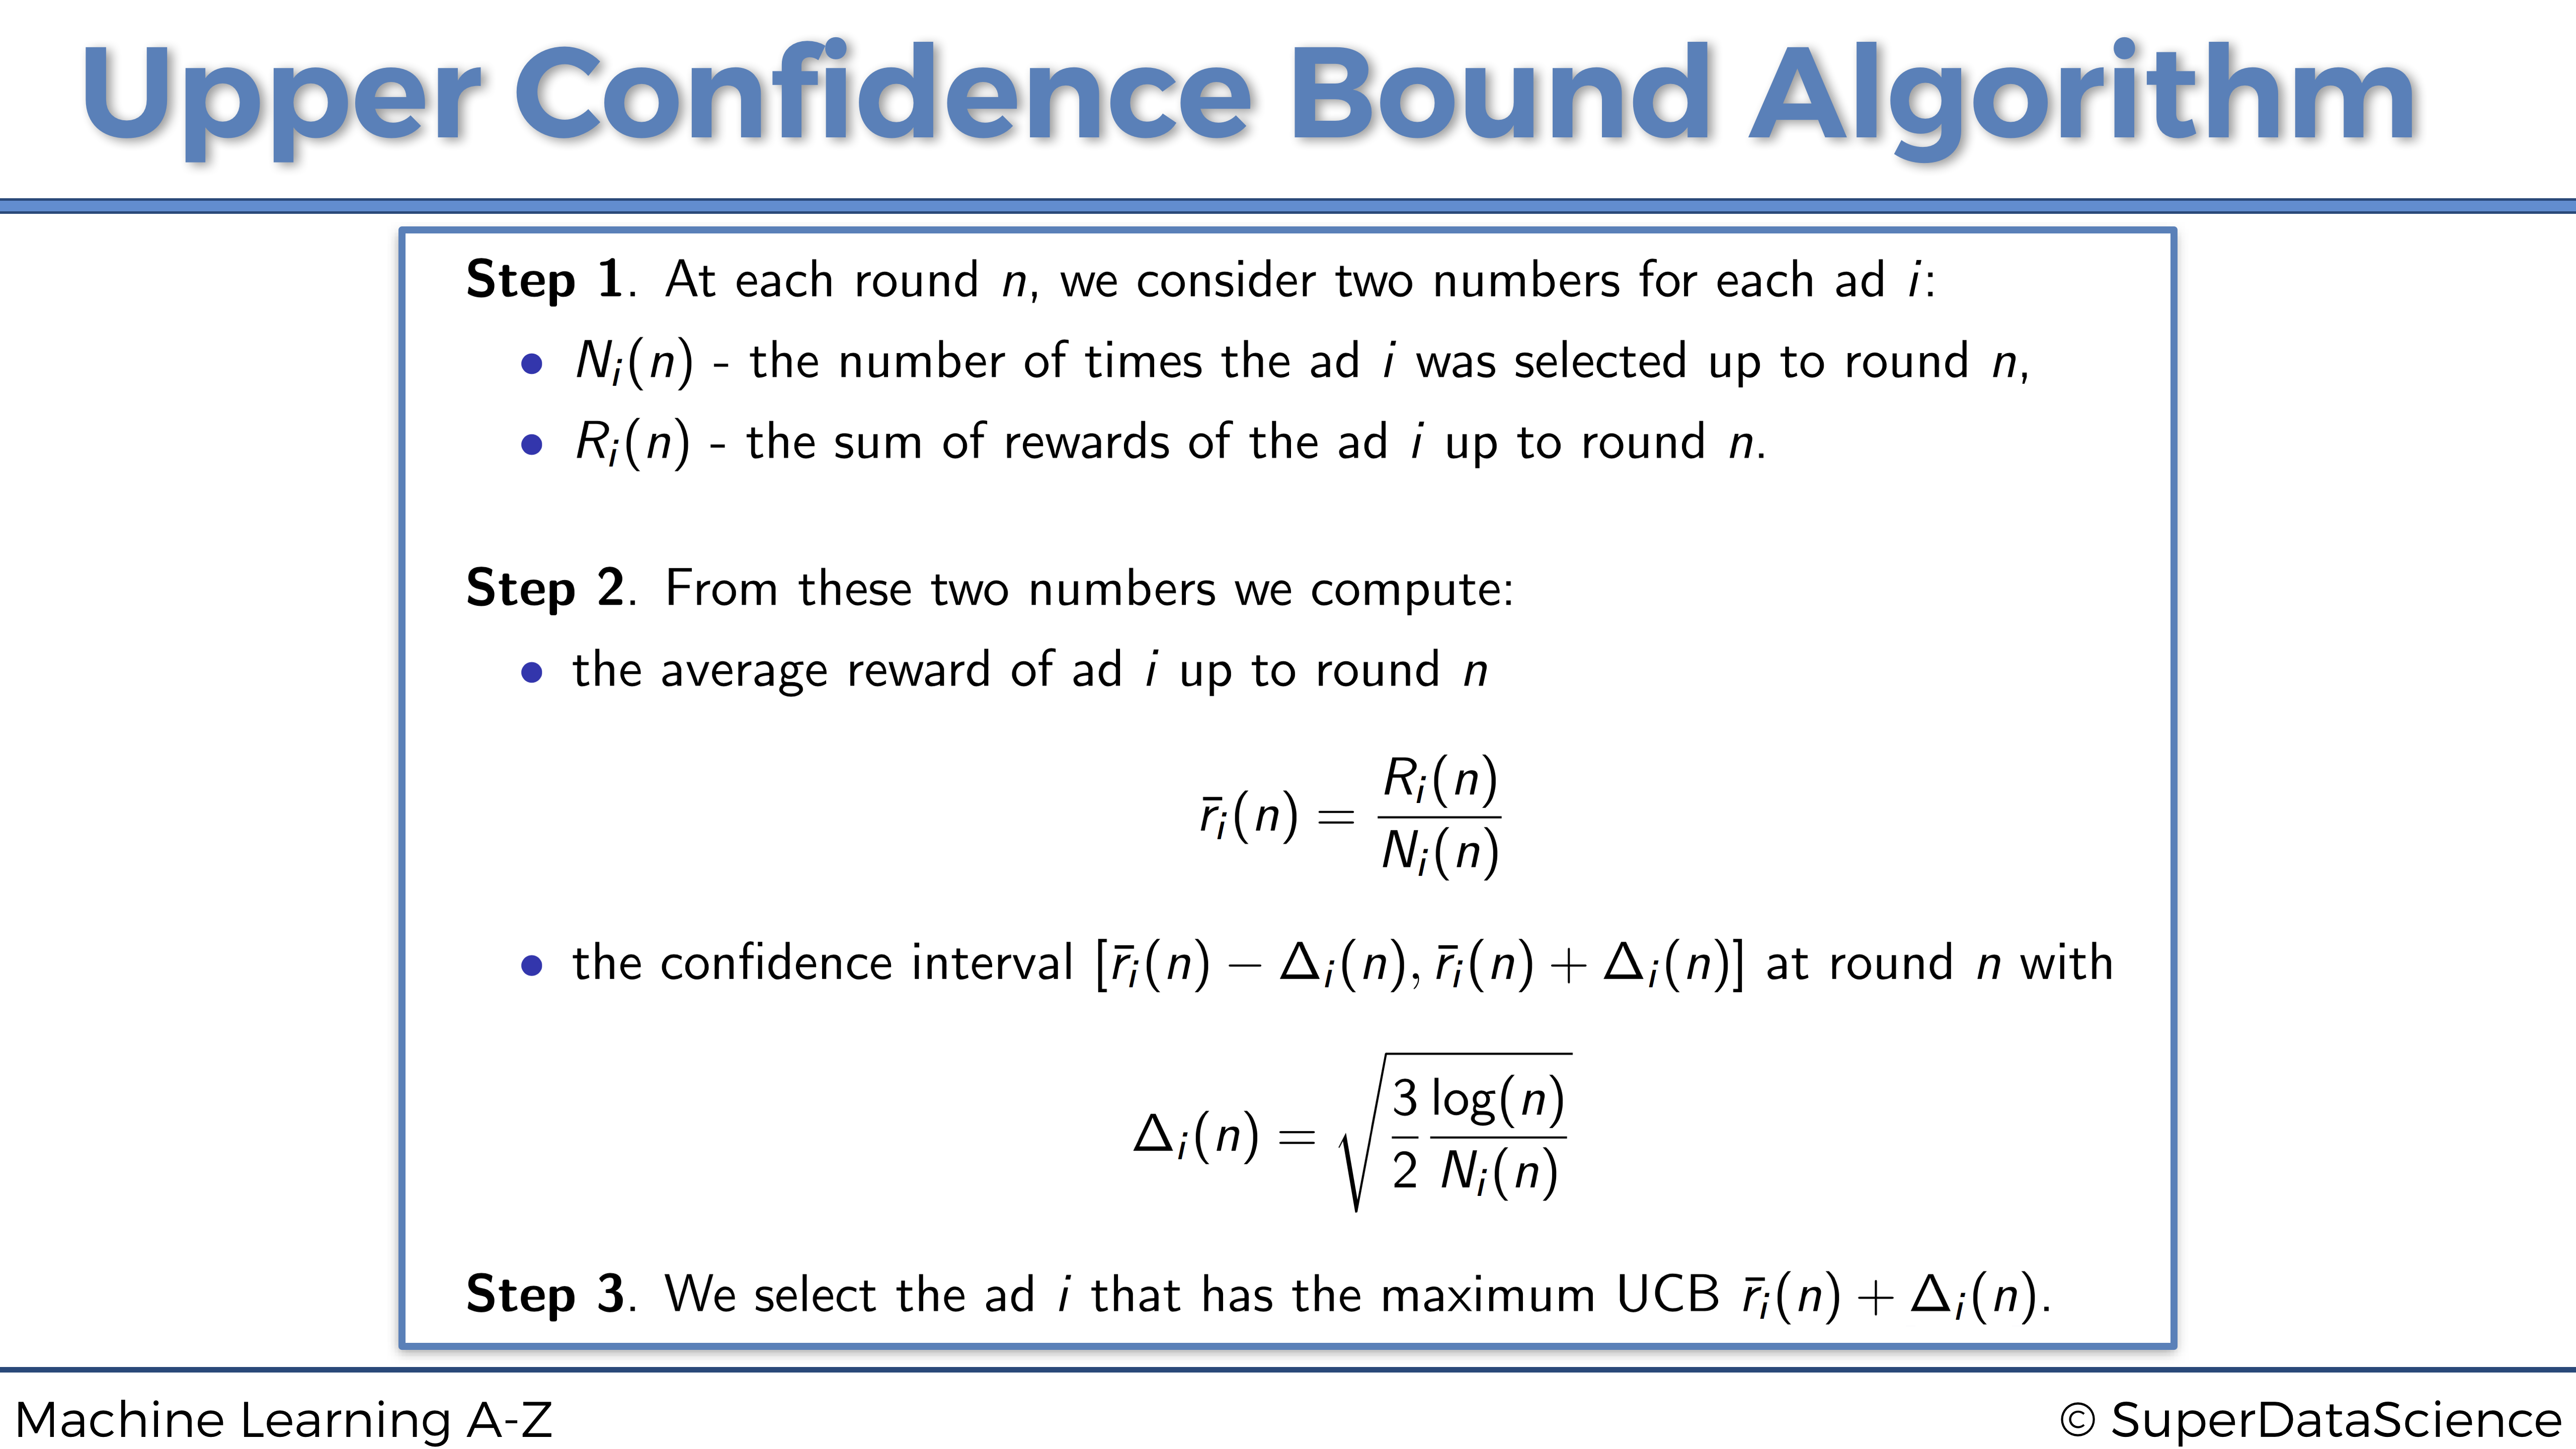

In [1]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/UCB_Algorithm_Slide.png")

In [28]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

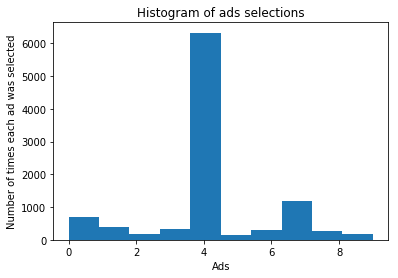

In [30]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

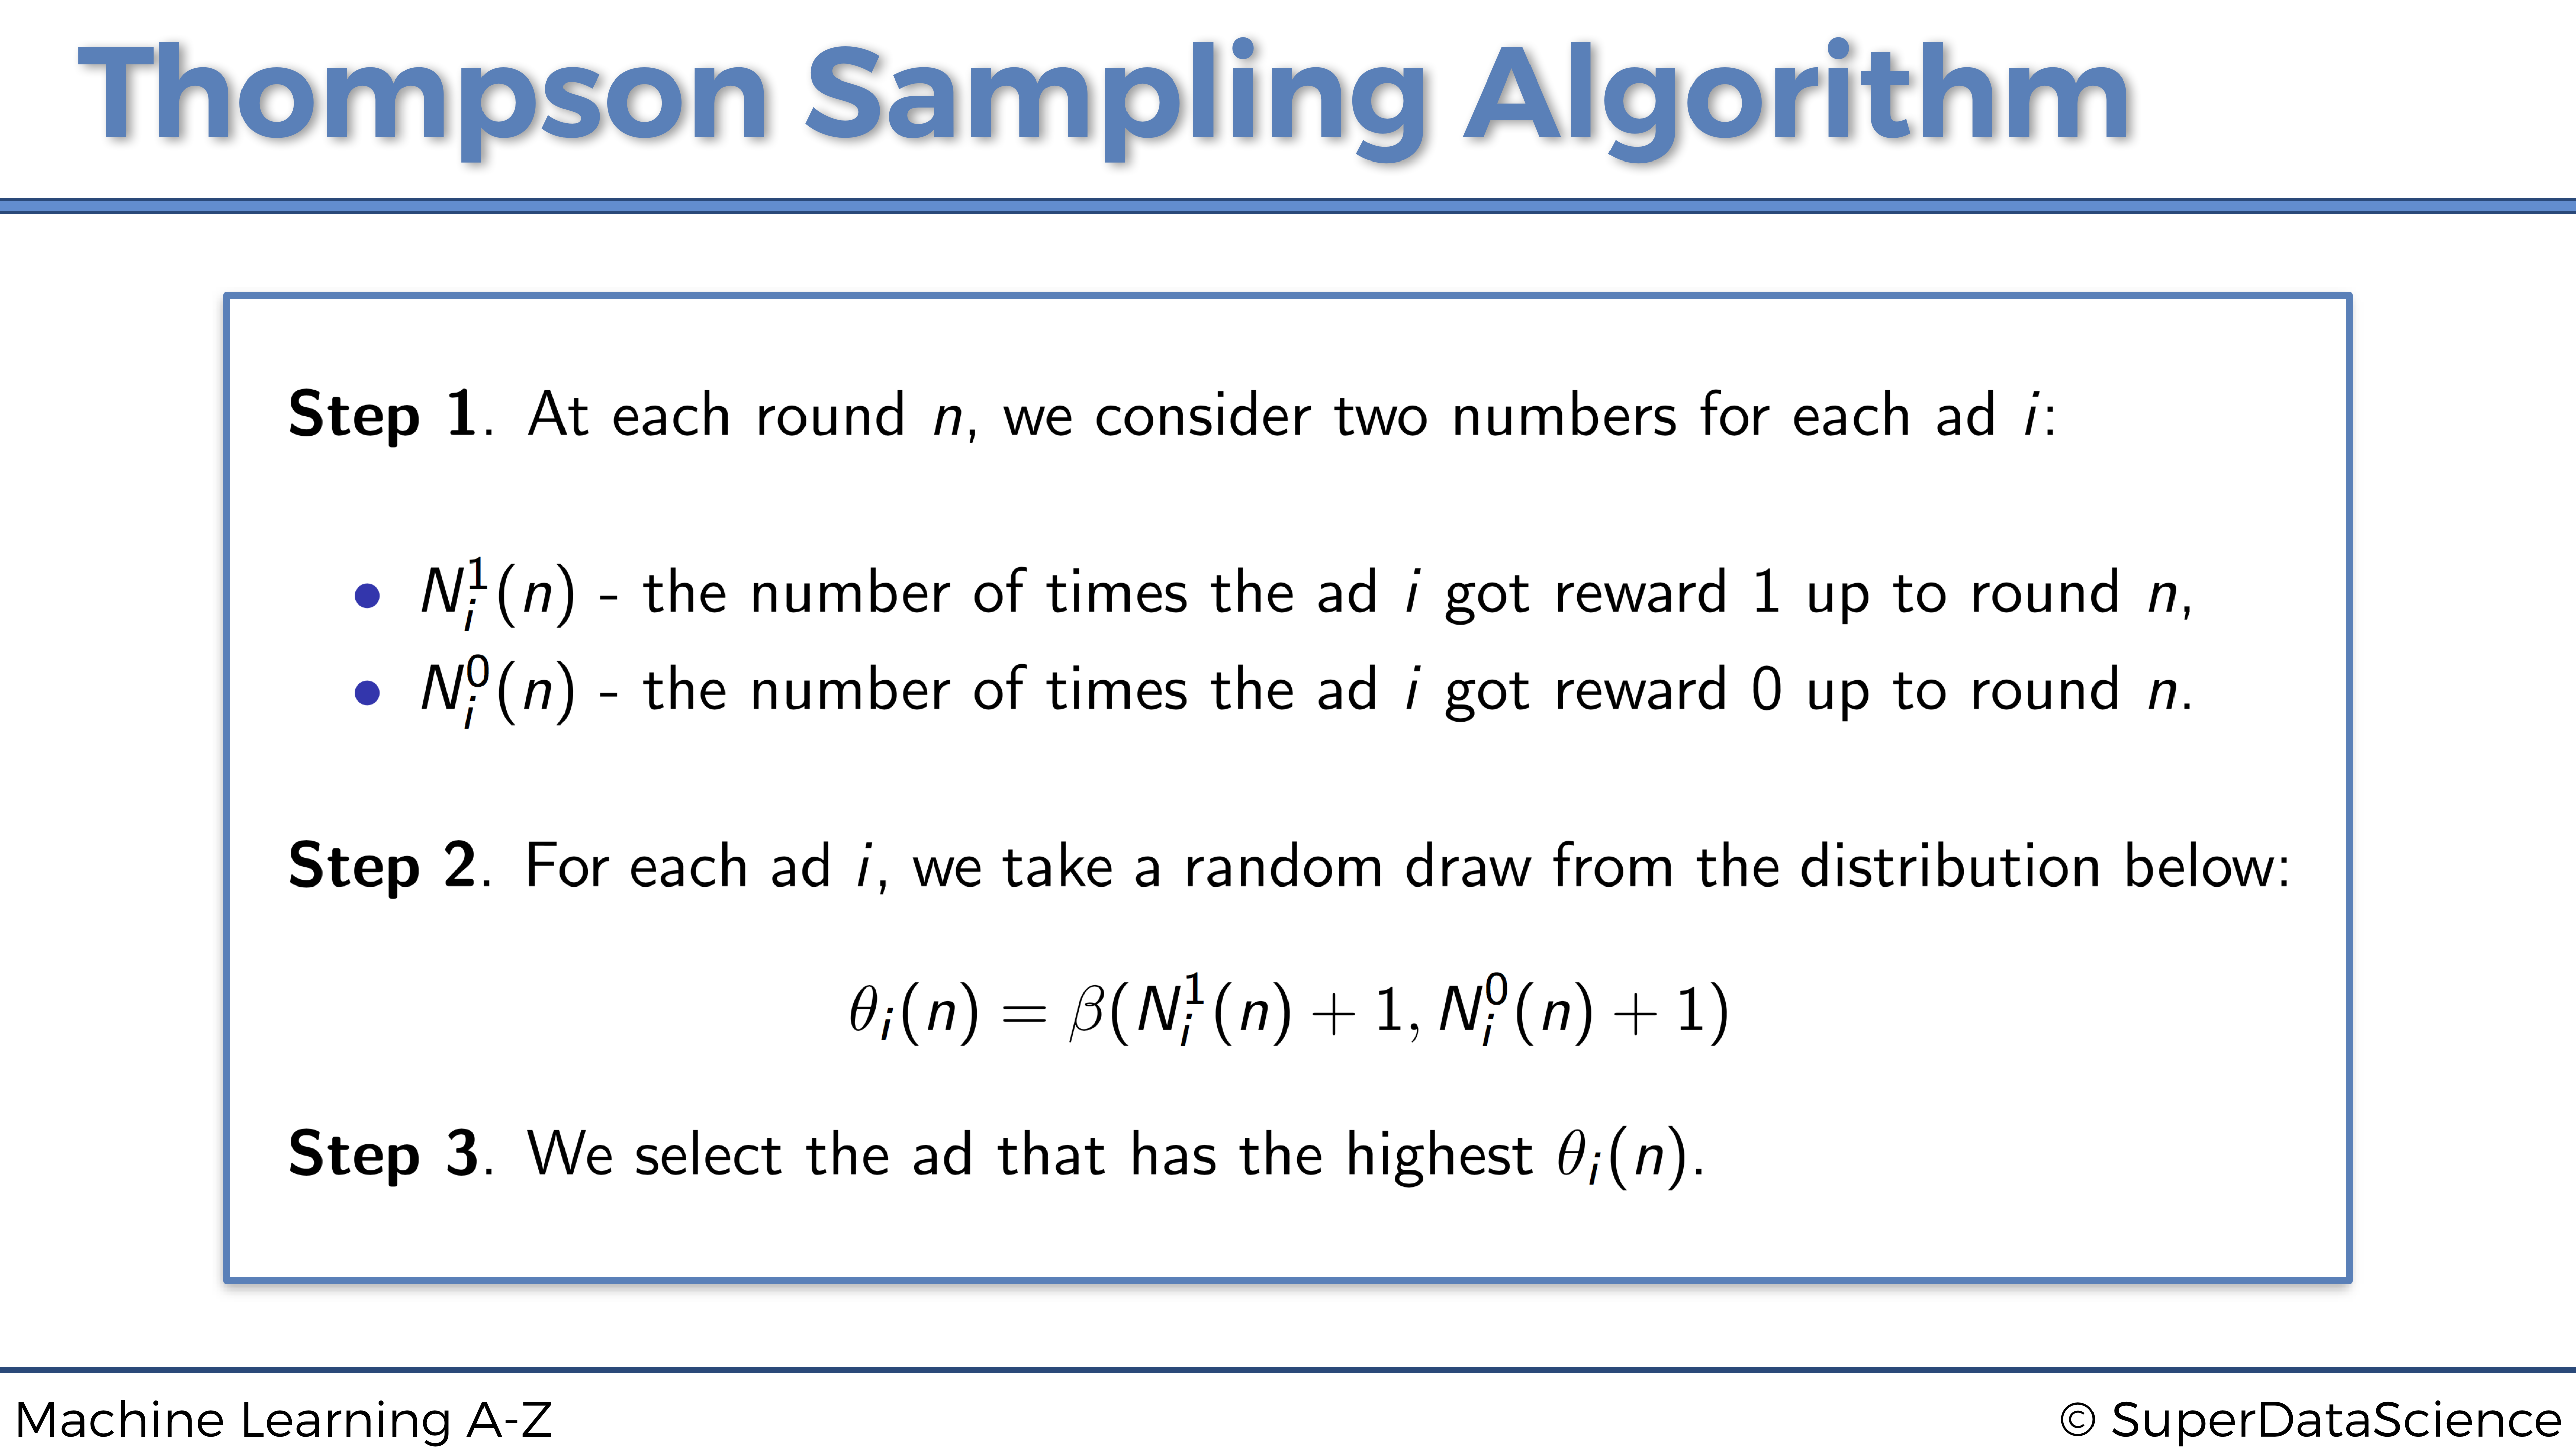

In [2]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Thompson_Sampling_Slide.png")

In [16]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 20 - UCB/Ads_CTR_Optimisation.csv')
dataset.head()

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0

In [17]:
# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

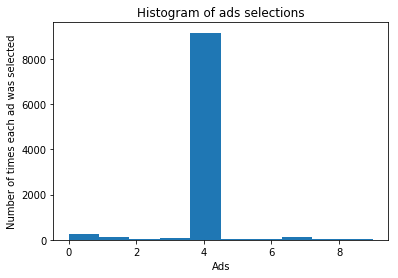

In [18]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Natural Language Processing

In [34]:
# Importing the dataset
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 22 - Natural_Language_Processing/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [27]:
dataset.shape

(1000, 2)

In [35]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Xuhuiz2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [39]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55, 42],
       [12, 91]])

# Deep Learning - Artificial Neural Networks

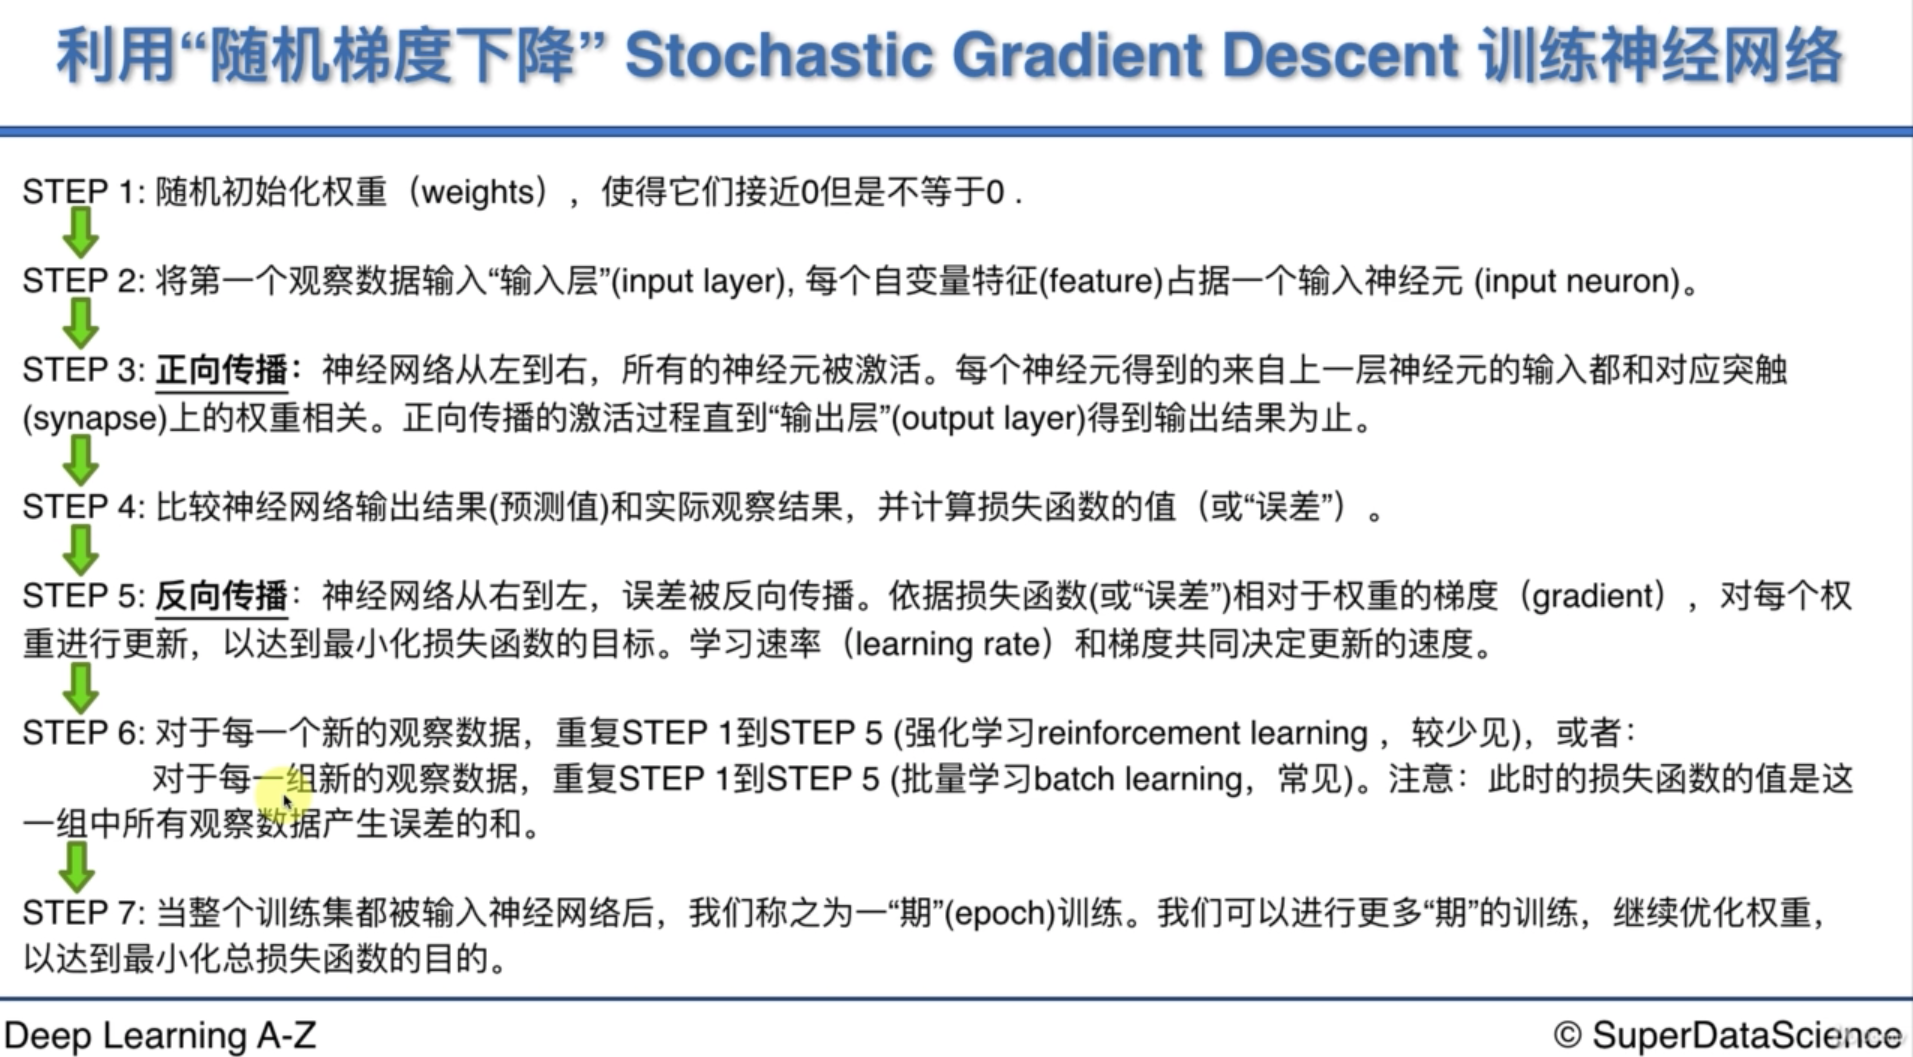

In [17]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Stochastic Gradient Descent.png")

In [11]:
# Part 1 - Data Preprocessing
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 31 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [12]:
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:, 13].values

In [13]:
# Part 1 - Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labellencoder_X_1 = LabelEncoder()
X[:,1] = labellencoder_X_1.fit_transform(X[:,1])
labellencoder_X_2 = LabelEncoder()
X[:,2] = labellencoder_X_2.fit_transform(X[:,2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]

In [14]:
# Part 1 - Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Part 1 - Normalize train data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [16]:
# Part 2 - Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [18]:
# Part 2 - Initialising ANN
classifier = Sequential()

In [19]:
# Part 2 - Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'uniform', input_dim = 11))

In [21]:
# Part 2 - Adding the second hidden layer
classifier.add(Dense(units = 6, activation = 'relu', kernel_initializer = 'uniform'))

In [23]:
# Part 2 - Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

In [24]:
# Part 2 - Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
# Part 2 - Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 3s 422us/step - loss: 0.5031 - acc: 0.7951
Epoch 2/100
8000/8000 [==============================] - 3s 348us/step - loss: 0.4305 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 3s 395us/step - loss: 0.4267 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 3s 356us/step - loss: 0.4230 - acc: 0.7960 0s - loss: 0.414
Epoch 5/100
8000/8000 [==============================] - 3s 354us/step - loss: 0.4197 - acc: 0.8057
Epoch 6/100
8000/8000 [==============================] - 3s 380us/step - loss: 0.4172 - acc: 0.8237
Epoch 7/100
8000/8000 [==============================] - 3s 410us/step - loss: 0.4154 - acc: 0.8256
Epoch 8/100
8000/8000 [==============================] - 3s 362us/step - loss: 0.4139 - acc: 0.8287
Epoch 9/100
8000/8000 [==============================] - 3s 381us/step - loss: 0.4125 - acc: 0.8304
Epoch 10/100
8000/8000 [==============================] - 3s 342us/step - loss: 0.4

8000/8000 [==============================] - 3s 358us/step - loss: 0.3930 - acc: 0.8362
Epoch 82/100
8000/8000 [==============================] - 3s 367us/step - loss: 0.3930 - acc: 0.8374
Epoch 83/100
8000/8000 [==============================] - 3s 354us/step - loss: 0.3927 - acc: 0.8354
Epoch 84/100
8000/8000 [==============================] - 3s 345us/step - loss: 0.3919 - acc: 0.8374
Epoch 85/100
8000/8000 [==============================] - 2s 305us/step - loss: 0.3915 - acc: 0.8365
Epoch 86/100
8000/8000 [==============================] - 2s 307us/step - loss: 0.3903 - acc: 0.8377
Epoch 87/100
8000/8000 [==============================] - 3s 349us/step - loss: 0.3889 - acc: 0.8385
Epoch 88/100
8000/8000 [==============================] - 3s 351us/step - loss: 0.3866 - acc: 0.8402
Epoch 89/100
8000/8000 [==============================] - 3s 343us/step - loss: 0.3845 - acc: 0.8407
Epoch 90/100
8000/8000 [==============================] - 3s 329us/step - loss: 0.3812 - acc: 0.8411
Epo

In [26]:
# Part 3 - Makeing the predictions and eveluating the model
y_pred = classifier.predict(X_test)

In [27]:
y_pred = (y_pred > 0.5)

In [31]:
# Part 3 - Makeing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   65],
       [ 230,  175]])

# Deep Learning - Convolutional Neural Network

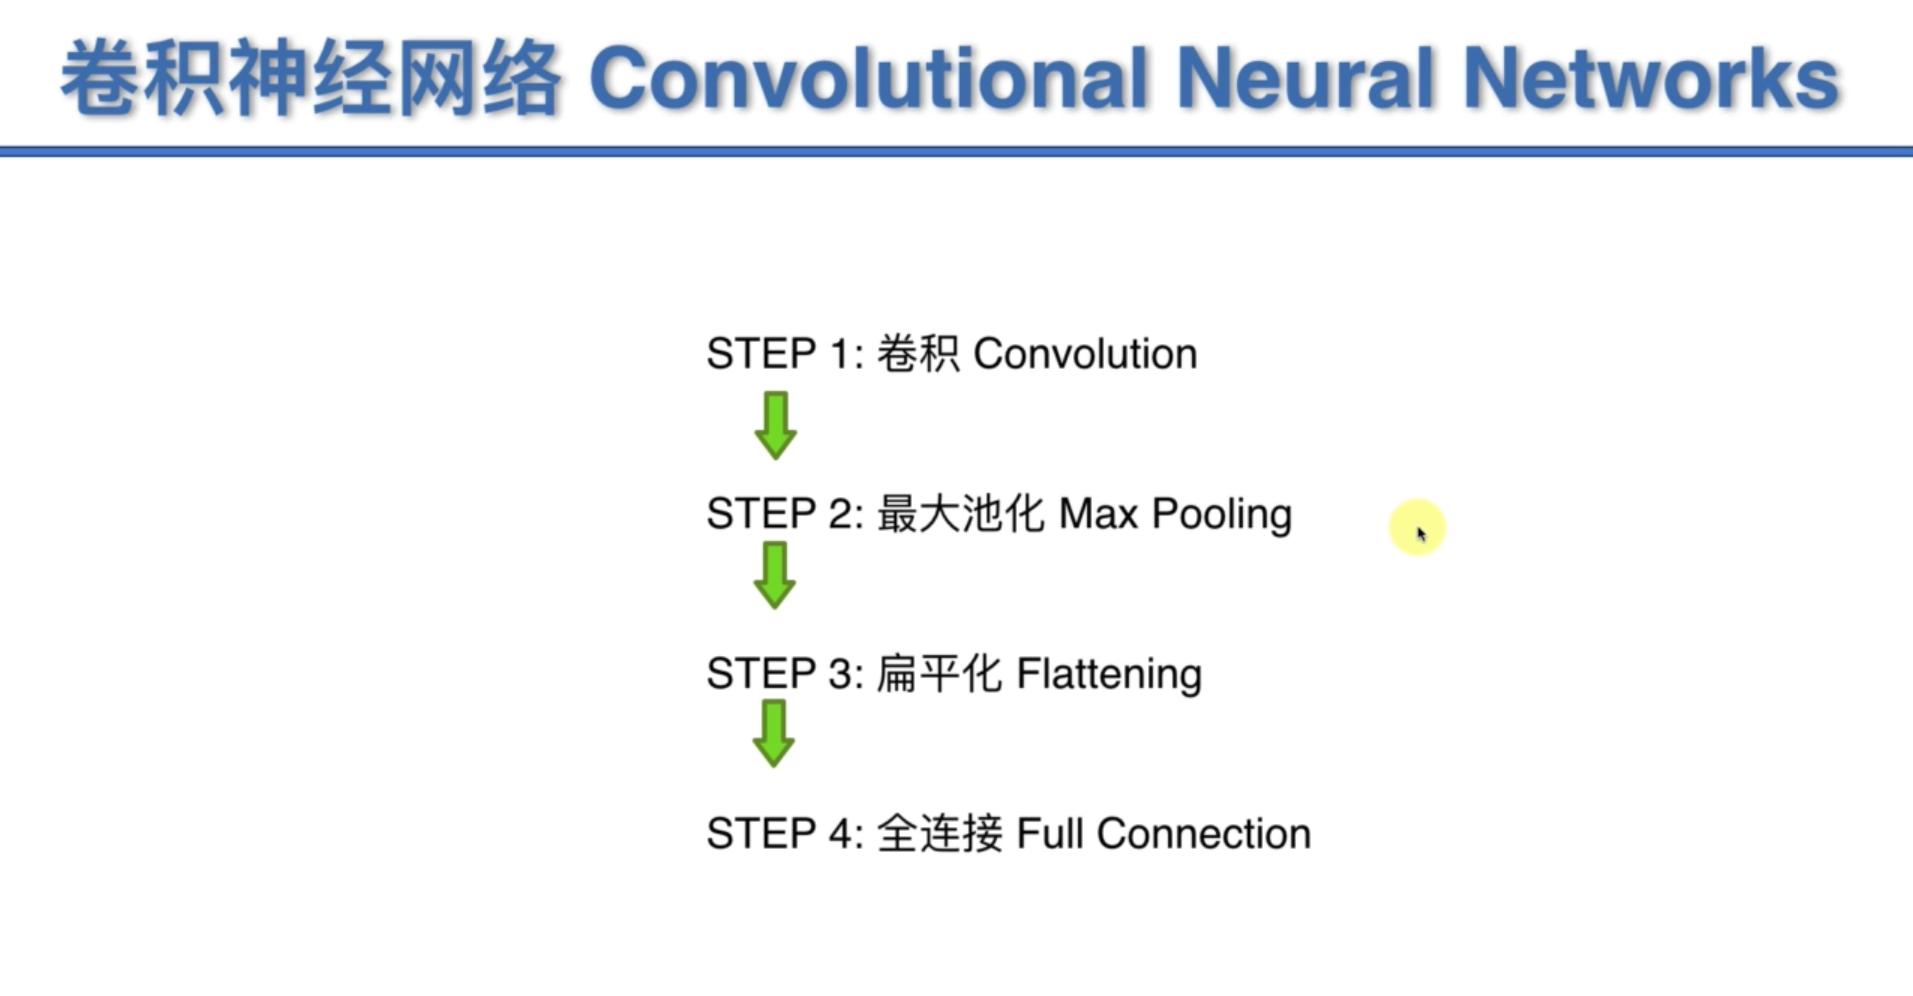

In [5]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/CNN.png")

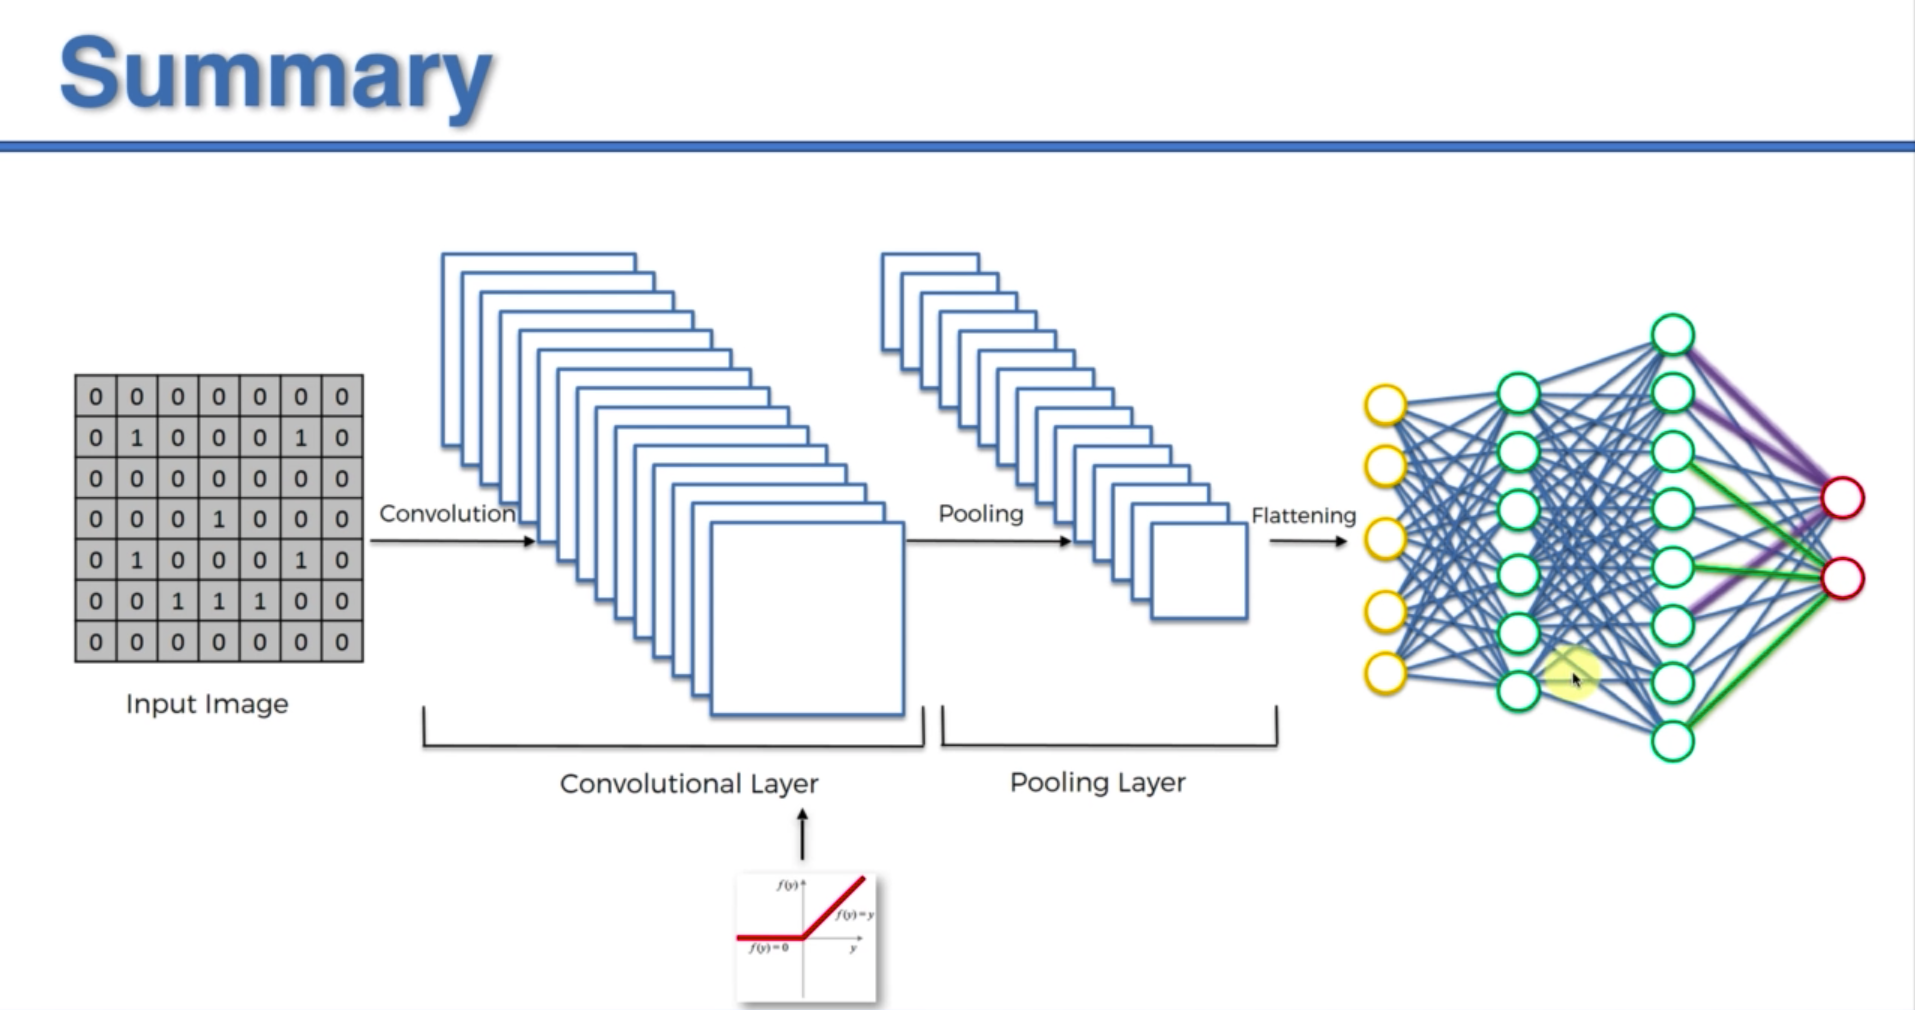

In [10]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/CNN.png")

In [2]:
# Part 1 - Building the CNN
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
# Part 1 - Initializing the CNN
classifier = Sequential()

In [15]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3,3), activation = 'relu', input_shape = (64,64,3)))

In [16]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [18]:
# Step 3 - Flattening
classifier.add(Flatten())

In [19]:
# Step 4 - Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [20]:
# Compiling CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 17 - Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 17 - Convolutional_Neural_Networks/dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')
classifier.fit_generator(training_set, steps_per_epoch = 250, epochs = 25, validation_data = test_set, validation_steps = 62.5)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 91s 362ms/step - loss: 0.7200 - acc: 0.5856 - val_loss: 0.6119 - val_acc: 0.6750
Epoch 2/25
250/250 [==============================] - 94s 374ms/step - loss: 0.6105 - acc: 0.6671 - val_loss: 0.5832 - val_acc: 0.6985
Epoch 3/25
250/250 [==============================] - 114s 456ms/step - loss: 0.5813 - acc: 0.6955 - val_loss: 0.5594 - val_acc: 0.7060
Epoch 4/25
250/250 [==============================] - 106s 424ms/step - loss: 0.5596 - acc: 0.7149 - val_loss: 0.5422 - val_acc: 0.7240
Epoch 5/25
250/250 [==============================] - 105s 422ms/step - loss: 0.5429 - acc: 0.7217 - val_loss: 0.5782 - val_acc: 0.6995
Epoch 6/25
250/250 [==============================] - 101s 404ms/step - loss: 0.5338 - acc: 0.7308 - val_loss: 0.5314 - val_acc: 0.7325
Epoch 7/25
250/250 [==============================] - 107s 429ms/step - loss: 0.5172 - acc: 0.7379 - v

In [17]:
# Improving model performance - Adding a second convolutional layer
classifier.add(Convolution2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 17 - Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 17 - Convolutional_Neural_Networks/dataset/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')
classifier.fit_generator(training_set, steps_per_epoch = 250, epochs = 25, validation_data = test_set, validation_steps = 62.5)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 87s 349ms/step - loss: 0.6859 - acc: 0.5535 - val_loss: 0.6675 - val_acc: 0.5995
Epoch 2/25
250/250 [==============================] - 98s 393ms/step - loss: 0.6546 - acc: 0.6164 - val_loss: 0.6557 - val_acc: 0.6160
Epoch 3/25
250/250 [==============================] - 85s 340ms/step - loss: 0.6295 - acc: 0.6438 - val_loss: 0.6052 - val_acc: 0.6750
Epoch 4/25
250/250 [==============================] - 94s 378ms/step - loss: 0.5984 - acc: 0.6775 - val_loss: 0.5736 - val_acc: 0.7235
Epoch 5/25
250/250 [==============================] - 95s 382ms/step - loss: 0.5652 - acc: 0.7077 - val_loss: 0.5476 - val_acc: 0.7255
Epoch 6/25
250/250 [==============================] - 82s 329ms/step - loss: 0.5382 - acc: 0.7223 - val_loss: 0.5491 - val_acc: 0.7205
Epoch 7/25
250/250 [==============================] - 74s 295ms/step - loss: 0.5136 - acc: 0.7438 - val_lo

# Unsupervised Learning  - Principle Component Analysis

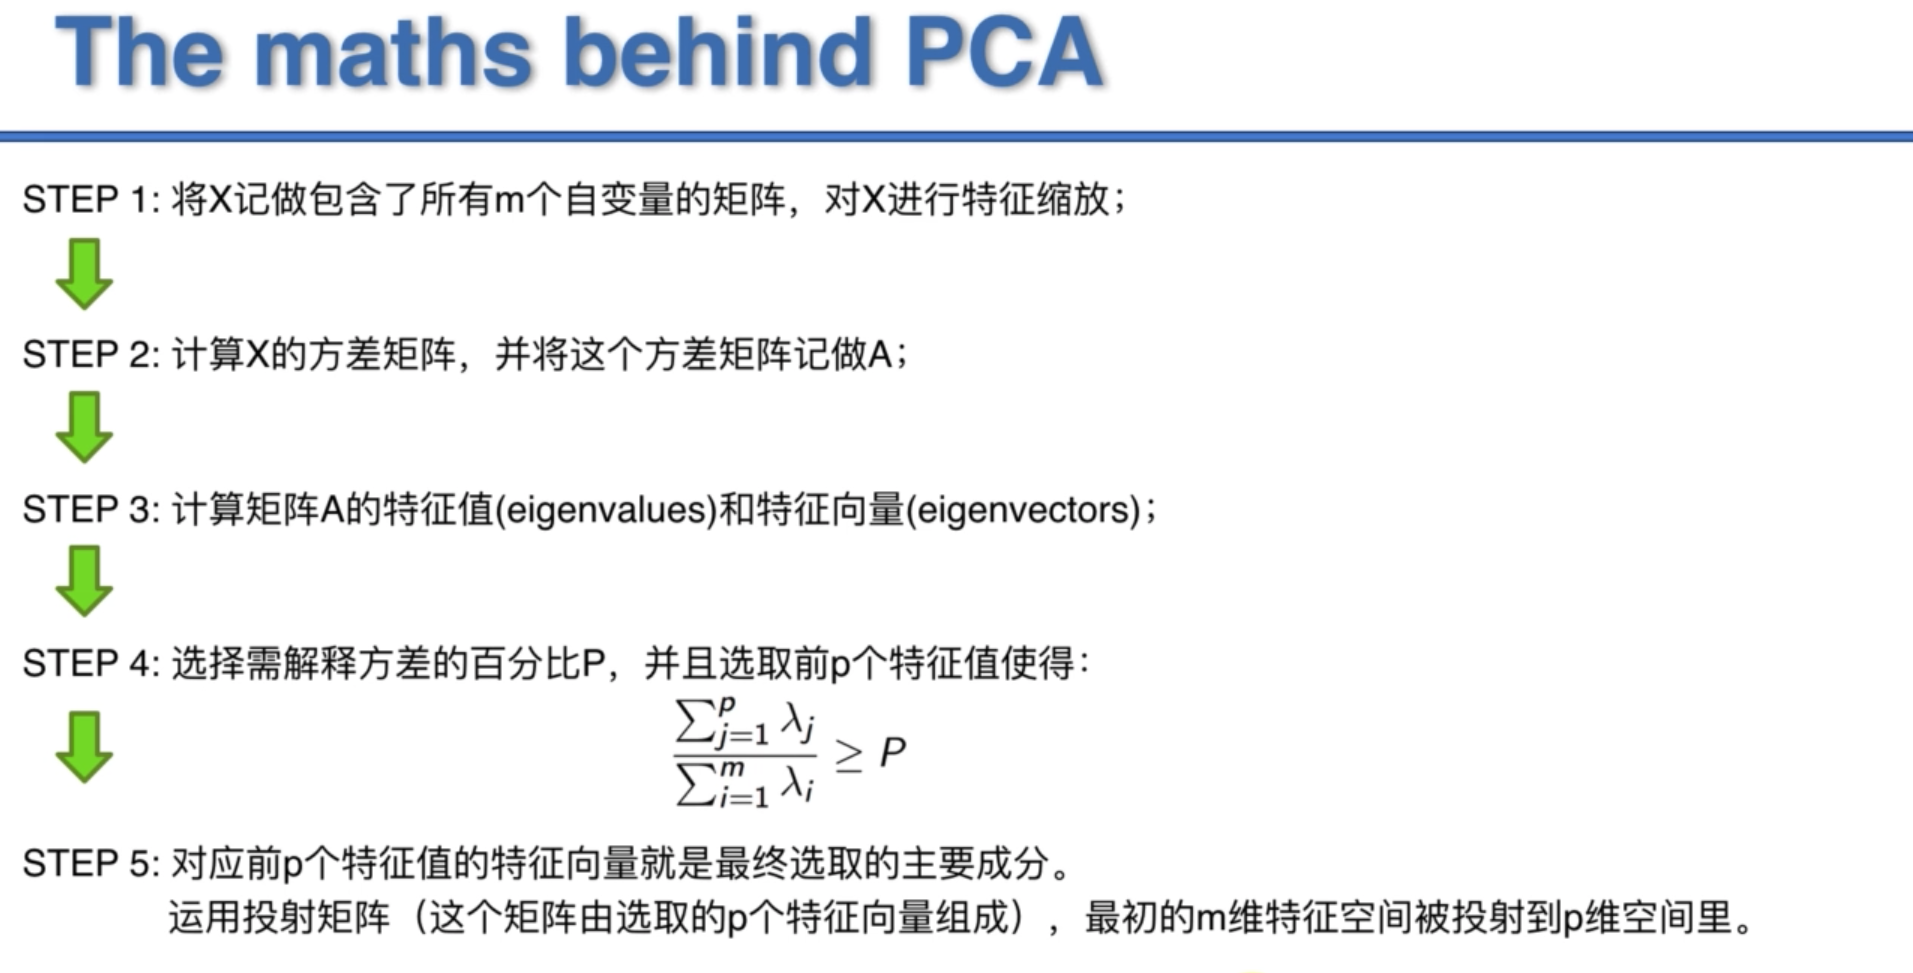

In [2]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/PCA.png")

In [10]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 18 - PCA/wine.csv')
dataset.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [11]:
X = dataset.iloc[:,0:13].values
y = dataset.iloc[:,13].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

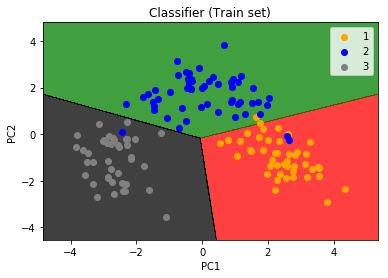

In [19]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue','grey'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

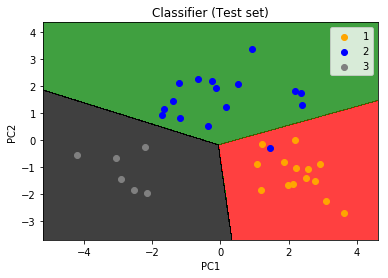

In [20]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue','grey'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Kernel PCA

In [3]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 19 - Kernel_PCA/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [4]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [8]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 6, 26]])

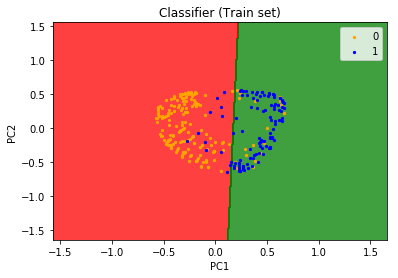

In [11]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j, s = 5)
plt.title('Classifier (Train set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

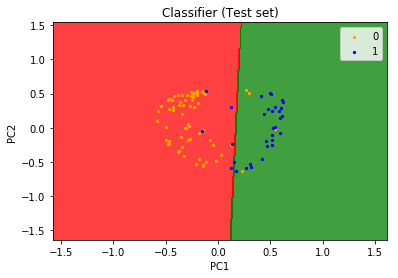

In [12]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j, s = 5)
plt.title('Classifier (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Cross Validation

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 19 - Kernel_PCA/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [11]:
accuracies.mean()

0.90053021876158679

# Grid Search

In [30]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 19 - Kernel_PCA/Social_Network_Ads.csv')
dataset.head()

User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0

In [31]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [38]:
print('Mean of Accuracy: ', accuracies.mean())
print('Std of Accuracy: ', accuracies.std())

Mean of Accuracy:  0.900530218762
Std of Accuracy:  0.0638895735663


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000], 'kernel': ['linear']},
              {'C': [1,10,100,1000], 'kernel': ['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [40]:
grid_search = grid_search.fit(X_train, y_train)

In [41]:
best_accuracy = grid_search.best_score_
best_accuracy

0.90333333333333332

In [42]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}